# <i> image segmentation

<p> image Segmentation involves converting an image into a collection of regions of pixels that are represented by a mask or a labeled image. By dividing an image into segments, you can process only the important segments of the image instead of processing the entire image.

<p> A common technique is to look for abrupt discontinuities in pixel values, which typically indicate edges that define a region.

<p> Another common approach is to detect similarities in the regions of an image. Some techniques that follow this approach are region growing, clustering, and thresholding.

<p> A variety of other approaches to perform image segmentation have been developed over the years using domain-specific knowledge to effectively solve segmentation problems in specific application areas.


## <i> image segmentation with Kmeans

<p> K-Means clustering algorithm is an unsupervised algorithm and it is used to segment the interest area from the background. It clusters, or partitions the given data into K-clusters or parts based on the K-centroids.

<p> The algorithm is used when you have unlabeled data(i.e. data without defined categories or groups). The goal is to find certain groups based on some kind of similarity in the data with the number of groups represented by K.

### steps of Kmean algorithm


- Choose the number of clusters K.
- Select at random K points, the centroids(not necessarily from your dataset).
- Assign each data point to the closest centroid → that forms K clusters.
- Compute and place the new centroid of each cluster.
- Reassign each data point to the new closest centroid. If any reassignment . took place, go to step 4, otherwise, the model is ready.

In [1]:
from PIL import Image, ImageStat
import numpy as np
import os
import matplotlib.pyplot as plt
from task4_util_segmentation import Kmeans, regionGrowing, MeanShift


Centroids intilized
###################
Convergence Reached!
[(230, 187, 186), (59, 43, 57)]


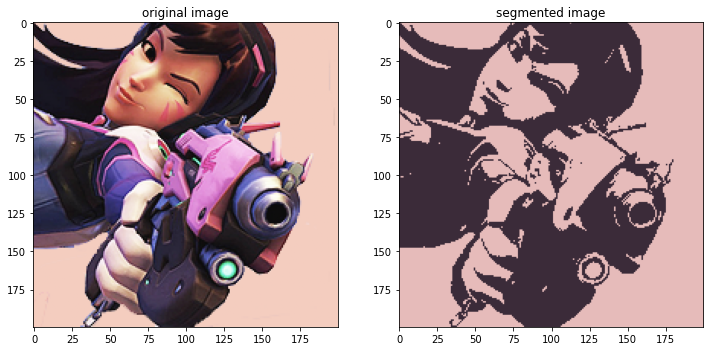

In [2]:
img_path = os.path.join(os.getcwd(),'img/test10.jpg')
model = Kmeans(img_path=img_path,n_clusters = 2)
model.draw()

Centroids intilized
###################
Convergence Reached!
[(9, 155, 158), (196, 149, 116), (10, 52, 53), (78, 57, 47)]


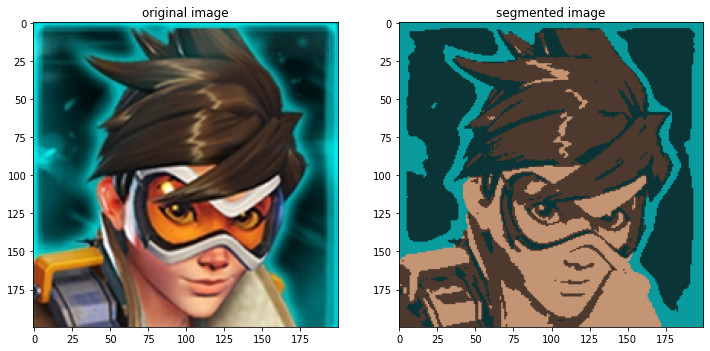

In [3]:
img_path = os.path.join(os.getcwd(),'img/test09.jpg')
model = Kmeans(img_path=img_path,n_clusters = 4)
model.draw()

## <i> image segmentation with region growing

<p> Region-growing methods rely mainly on the assumption that the neighboring pixels within one region have similar values. The common procedure is to compare one pixel with its neighbors. If a similarity criterion is satisfied, the pixel can be set to belong to the cluster as one or more of its neighbors. The selection of the similarity criterion is significant and the results are influenced by noise in all instances.

<p> This method takes a set of seeds as input along with the image. The seeds mark each of the objects to be segmented. The regions are iteratively grown by comparison of all unallocated neighboring pixels to the regions. The difference between a pixel’s intensity value and the region’s mean, is used as a measure of similarity. The pixel with the smallest difference measured in this way is assigned to the respective region. This process continues until all pixels are assigned to a region. Because seeded region growing requires seeds as additional input, the segmentation results are dependent on the choice of seeds, and noise in the image can cause the seeds to be poorly placed.

In [4]:
import cv2
image_path = os.path.join(os.getcwd() , "img/brain-slice40.tiff")
image = cv2.imread(image_path,0)


In [5]:
seed = (150, 150)
region = regionGrowing(image, 9.8, seed)

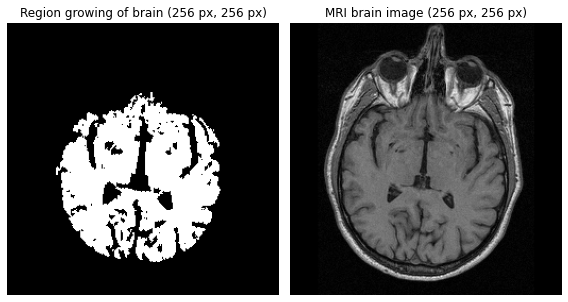

In [6]:
im_h, im_w = image.shape
# Display images
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(region, cmap="gray")
ax[0].set_title('Region growing of brain ({} px, {} px)'.format(im_h, im_w))
ax[0].axis('off')

ax[1].imshow(image, cmap="gray")
ax[1].set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax[1].axis('off')

plt.tight_layout()
plt.show()

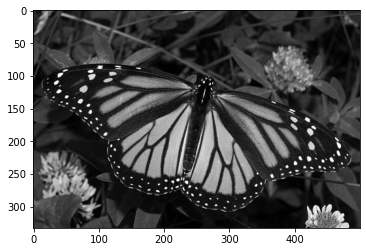

In [7]:
image_path = os.path.join(os.getcwd(), "img/Butterfly.jpg")
image = cv2.imread(image_path,0)
plt.imshow(image, cmap="gray")

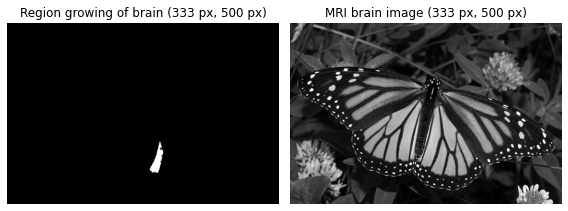

In [8]:
# image_path = os.path.join(os.getcwd() , "img/Butterfly.jpg")
# image = cv2.imread(image_path,0)

seed = (230, 280)
region = regionGrowing(image, 9.8, seed)

im_h, im_w = image.shape
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(region, cmap="gray")
ax[0].set_title('Region growing of brain ({} px, {} px)'.format(im_h, im_w))
ax[0].axis('off')
ax[1].imshow(image, cmap="gray")
ax[1].set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax[1].axis('off')
plt.tight_layout()
plt.show()

## <i> image segmentation with mean shift clustering

<p> Mean shift clustering is a non-parametric technique for clustering, it isn’t require to specify the number of clusters. Also it is robust for outliers as clusters aren’t in spherical shape it takes a none-linear shape according to clustering procedure.

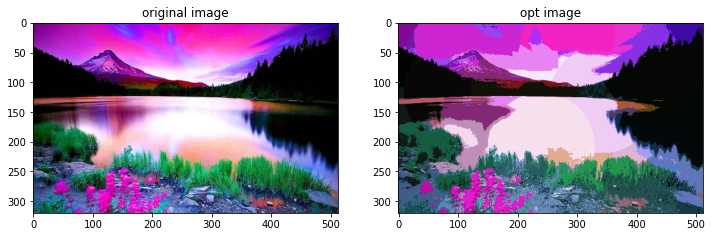

In [10]:
imgPath = os.path.join(os.getcwd(),'img/test03.jpg')

mean_shift = MeanShift(imgPath)
mean_shift.draw()


## Agglomerative Clustering

The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram.

[Agglomerative Clustering Resource](https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/)

In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from task4_util_segmentation import agglomerate_clustering
from task4_util import comparison_plot

Processing k=2:
Computing initial clusters ...
merging clusters ...
assigning cluster num to each point ...
Computing cluster centers ...
time for k=2 clusters: 11.22


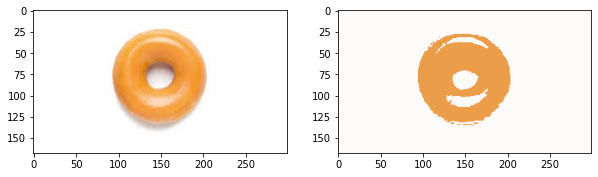

Processing k=3:
Computing initial clusters ...
merging clusters ...
assigning cluster num to each point ...
Computing cluster centers ...
time for k=3 clusters: 11.58


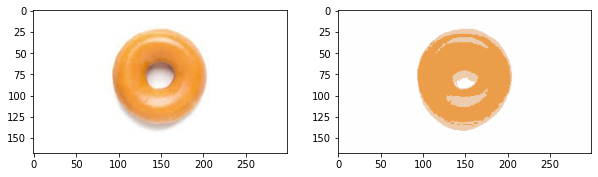

Processing k=4:
Computing initial clusters ...
merging clusters ...
assigning cluster num to each point ...
Computing cluster centers ...
time for k=4 clusters: 11.19


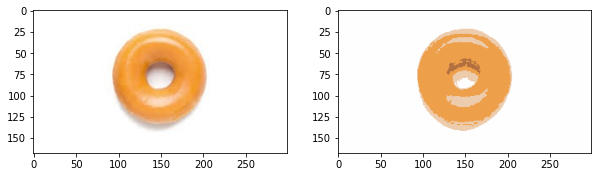

In [3]:
img = mpimg.imread("./images/donut.jpeg")
pixels = img.reshape((-1,3))

n_clusters = range(2,5)
for k in n_clusters:
    print(f'Processing k={k}:')
    clustered_img = agglomerate_clustering(img, pixels, k)
    comparison_plot(img, clustered_img)

Processing k=2:
Computing initial clusters ...
merging clusters ...
assigning cluster num to each point ...
Computing cluster centers ...
time for k=2 clusters: 19.6


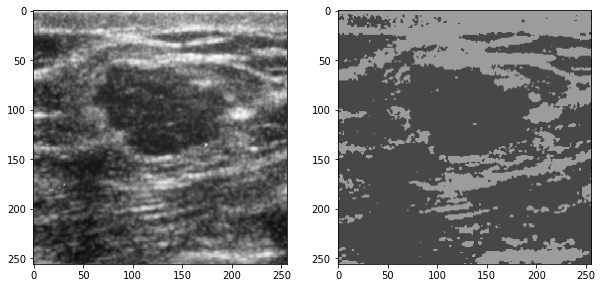

Processing k=3:
Computing initial clusters ...
merging clusters ...
assigning cluster num to each point ...
Computing cluster centers ...
time for k=3 clusters: 19.26


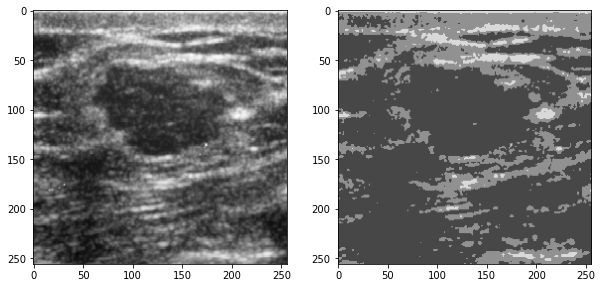

Processing k=4:
Computing initial clusters ...
merging clusters ...
assigning cluster num to each point ...
Computing cluster centers ...
time for k=4 clusters: 18.78


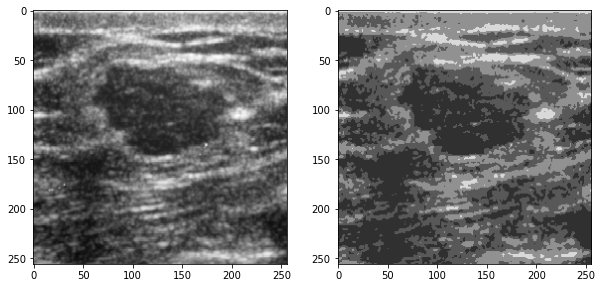

In [4]:
img = mpimg.imread("./images/mama07ORI.bmp")
pixels = img.reshape((-1,3))

n_clusters = range(2,5)
for k in n_clusters:
    print(f'Processing k={k}:')
    clustered_img = agglomerate_clustering(img, pixels, k)
    comparison_plot(img, clustered_img)



